## Import Library

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import random 

random.seed(202510)

## Load velocity models

In [2]:
Vel_flat_fault_a = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Vel_Family/Flat_Fault_A/model/model5.npy')
Vel_flat_fault_b = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Vel_Family/Flat_Fault_A/model/model4.npy')
Style_style_a = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Style_Family/Style_A/model5.npy')
Style_style_b = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Style_Family/Style_A/model4.npy')
Fault_curve_fault_a = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Fault_Family/Curve_Fault_A/vel2_1_10.npy')
Fault_curve_fault_b = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Fault_Family/Curve_Fault_A/vel2_1_11.npy')
Vel_curve_a = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Vel_Family/CurveVel_A/model/model5.npy')
Vel_curve_b = np.load('/home/g202321530/Yang/Data/Open_FWI/Data/Vel_Family/CurveVel_A/model/model4.npy')

# combine the training data from different velocity families together
train_vel = np.concatenate([Style_style_a, Fault_curve_fault_a, Vel_curve_a], axis=1)
test_vel_in_distribution = np.concatenate([Style_style_b, Fault_curve_fault_b, Vel_curve_b], axis=1)
np.save('/home/g202321530/Yang/SEEM_Group/TA/PIFNOeikonal-main/data/train_vel.npy', train_vel)
np.save('/home/g202321530/Yang/SEEM_Group/TA/PIFNOeikonal-main/data/test_vel_in_distribution.npy', test_vel_in_distribution)
np.save('/home/g202321530/Yang/SEEM_Group/TA/PIFNOeikonal-main/data/test_vel.npy', Vel_flat_fault_a)

# check the shape
train_vel.shape

(500, 3, 70, 70)

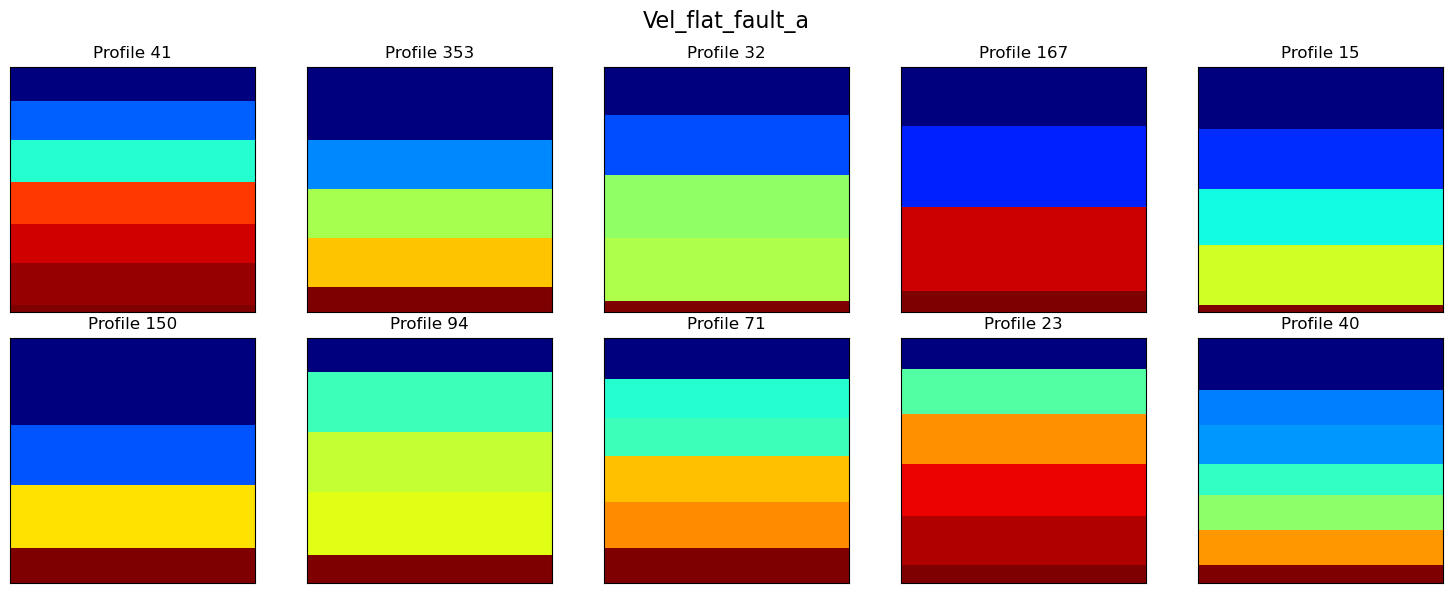

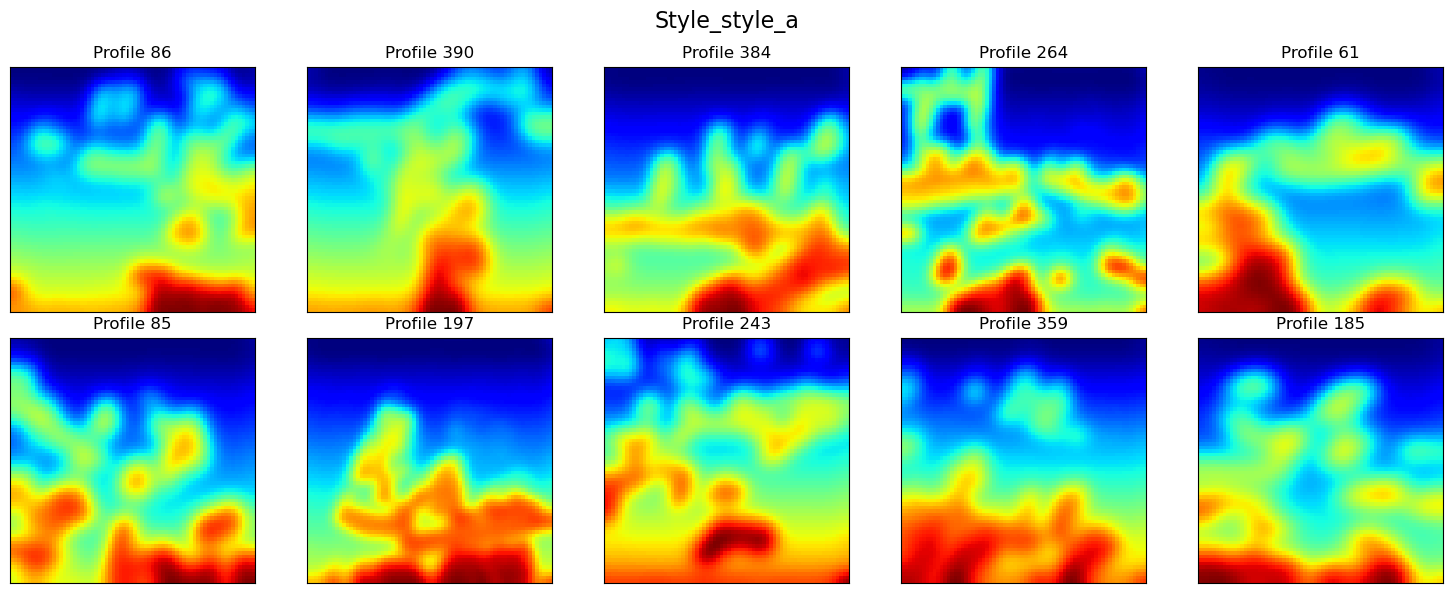

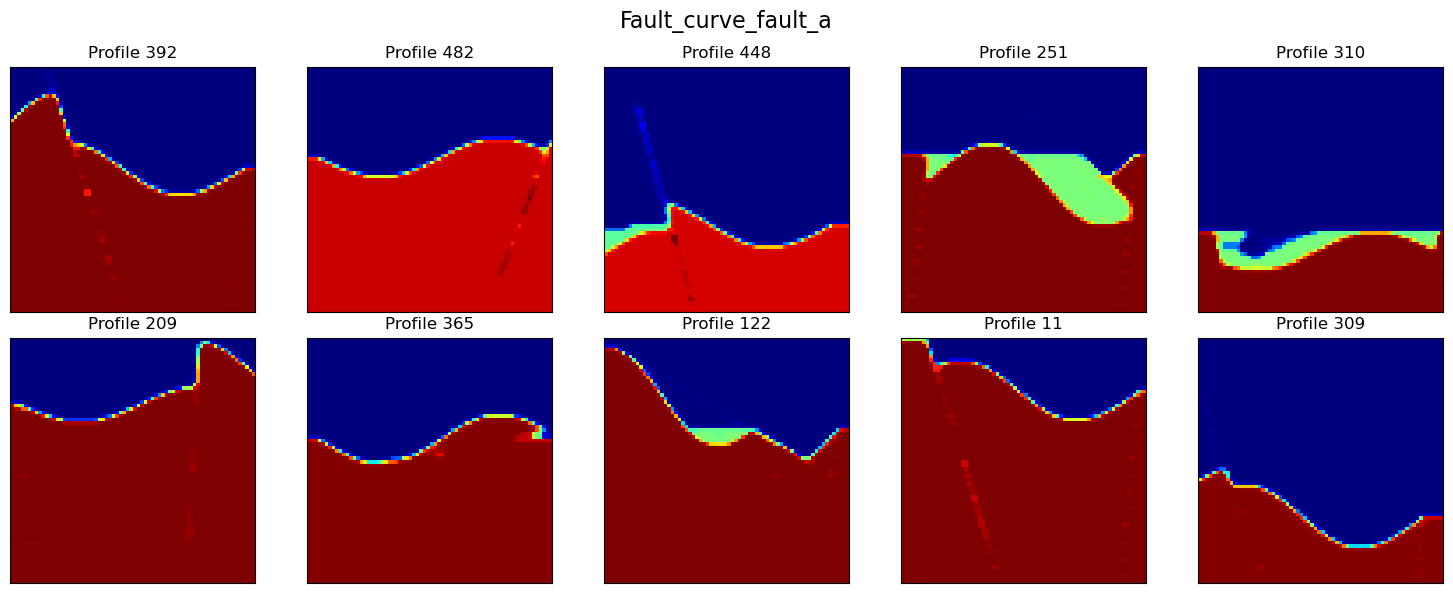

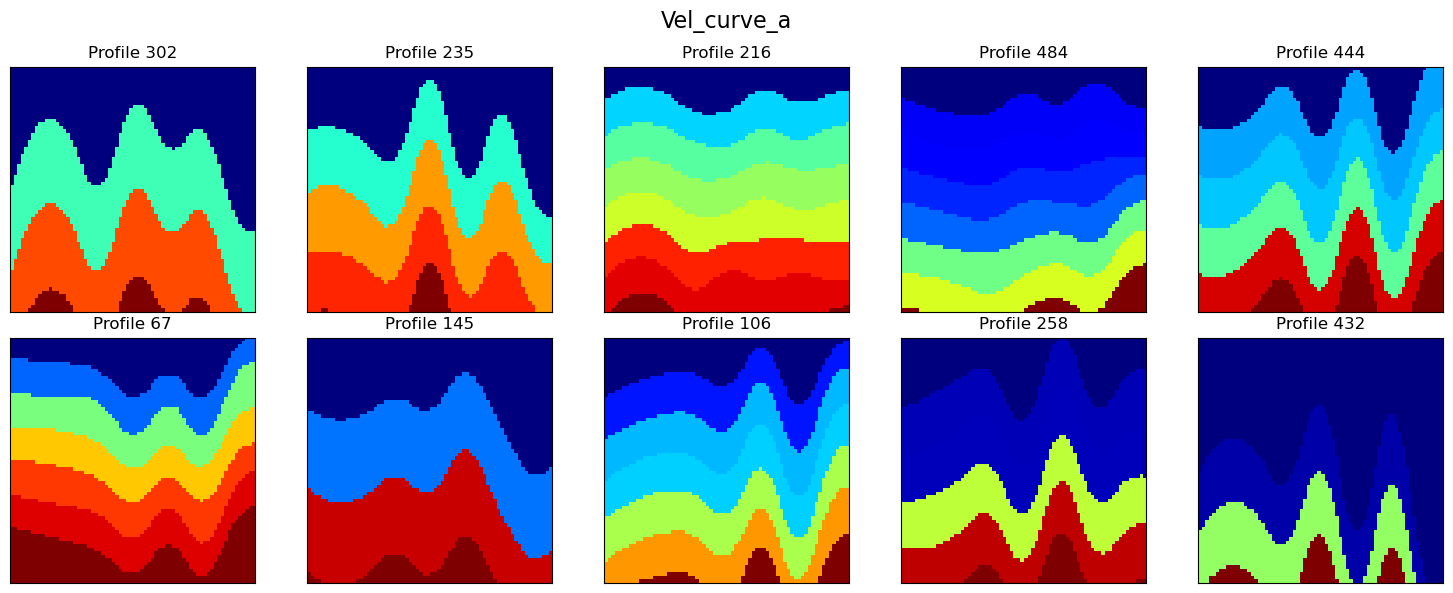

In [3]:
# List of models for easy iteration
models = {
    'Vel_flat_fault_a': Vel_flat_fault_a,
    'Style_style_a': Style_style_a,
    'Fault_curve_fault_a': Fault_curve_fault_a,
    'Vel_curve_a': Vel_curve_a
}

# Number of random profiles to visualize per model
num_profiles = 10

# For each model, select random indices and plot
for model_name, model_data in models.items():
    # Select 10 random indices
    random_indices = random.sample(range(model_data.shape[0]), num_profiles)
    
    # Create a figure with 2x5 subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, idx in enumerate(random_indices):
        # Extract the 70x70 profile (squeeze the channel dimension)
        profile = model_data[idx, 0, :, :]
        
        # Plot the profile
        im = axes[i].imshow(profile, cmap='jet', aspect='equal')
        axes[i].set_title(f'Profile {idx}')
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    
    # Add colorbar
    # plt.colorbar(im, ax=axes, orientation='vertical', fraction=0.02)
    
    # Set title for the figure
    fig.suptitle(f'{model_name}', fontsize=16)
    
    plt.tight_layout()
    plt.savefig(f'./figs/vel_example_{model_name}.png', dpi=300)
    plt.show()